In [1]:
# importing the relevant functions

import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import os
import glob

In [57]:
# Defining the relevant functions

def rescale(x, y, s):
    x_rescale = x * s * (26/2.1)
    y_rescale = y * s * (26/2.1)
    return x_rescale, y_rescale

def normal(x, mu, sigma, A):
    return A * np.exp( (- (x - mu)**2/(2 *sigma**2)))

def lognormal(x, mu, sigma, A):
    return (A/(x *mu)) * np.exp( (- (np.log(x) - mu)**2/(2 * sigma**2) ))

def laplacian(x, mu, sigma, A):
    return A * np.exp((- np.abs(x - mu)/sigma))

def redchi2(y_data, y_fit, y_err):
    chi2 = np.sum((y_data - y_fit)**2/(y_err**2))
    redchi2 = chi2 / (len(y_data) - 3)
    return redchi2

def uncertainty_prop(data, data_err, data_rescale):
    return data_rescale * np.sqrt((data_err/data)**2 + (0.05/2.1)**2)
    


In [58]:
# inputting the values as arrays:

x_array = np.array([0.8, 1.3, 2.9, 1.3, 2.7, 1.3, 2.6, 0.9, 1.1, 1.2, 0.6, 1.2])
y_array = np.array([3.5, 4.5, 2.0, 2.2, 3.2, 3.0, 4.5, 4.5, 4.7, 0.8, 3.2, 3.1])
x_err_array = np.full(12, 0.1)
y_err_array = np.full(12, 0.1) 

s_array = np.array([2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 3, 2])


In [59]:
# Defining the relevant functions for the mcmc

import emcee
import corner

def mc_normal_model(Theta, x):
    mu, sigma, A = Theta
    return normal(x, mu, sigma, A)

def mc_lognormal_model(Theta, x):
    mu, sigma, A = Theta
    return lognormal(x, mu, sigma, A)

def mc_laplacian_model(Theta, x):
    mu, sigma, A = Theta
    return laplacian(x, mu, sigma, A)

'''
This likelihood function only takes into account the x errors
def lnlike(Theta, x, y, yerr, model_name):
    if model_name == 'normal':
        y_model =mc_normal_model(Theta, x)
    elif model_name == 'lognormal':
        y_model =mc_lognormal_model(Theta, x)
    else:
        y_model =mc_laplacian_model(Theta, x)
    LnLike = -(1/2) * np.sum((y-y_model)**2/(yerr)**2)
    return LnLike
'''
 
def lnlilke(Theta, x, y, xerr, yerr, model_name):
    mu, sigma, A = Theta
    
    variance = (xerr * A) ** 2 + yerr ** 2  

    if model_name == 'normal':
        model_y = mc_normal_model(Theta, x)
        residual = y - model_y
        LnLike= -0.5 * np.sum(residual**2 / variance + np.log(variance))
    if model_name == 'lognormal':
        model_y = mc_lognomral_model(Theta, x)
        residual = yobs - model_y
        LnLike= -0.5 * np.sum((residual**2 / variance) + np.log(variance) + np.log(2 * np.pi))
    if model_name == 'laplacian':
        model_y = mc_laplacian_model(Theta, x)
        residual = yobs - model_y
        LnLike = -np.sum(np.abs(residuals) / variance + np.log(2 * sigma))
    
    return LnLike

def lnprior(Theta):
    mu, sigma, A = Theta
    if  min(x_res_array) > mu or max(x_res_array) < mu or sigma < 0 or sigma >3 *  np.std(x_res_array) or A < 0 or A > 2 * max(y_res_array):
        return 0.0
    else: 
        return -np.inf 
    
def lnprob(Theta, x, y, yerr, model_name):
    lp = lnprior(Theta)
    if np.isneginf(lp):
        return  -np.inf
    else:
        return lp + lnlike(Theta, x, y, yerr, model_name)


def sample_walkers(nsamples, flattened_chain, x, model_name):
    models = []
    draw = np.floor(np.random.uniform(0,len(flattened_chain),size=nsamples)).astype(int)
    thetas = flattened_chain[draw]
    for i in thetas:
        if model_name == 'normal':
            mod =mc_normal_model(i, x)
        elif model_name == 'lognormal':
            mod =mc_lognormal_model(i, x)
        else:
            mod =mc_laplacian_model(i, x)
        models.append(mod)
    spread = np.std(models,axis=0)
    med_model = np.median(models,axis=0)
    return med_model,spread


def main(p0,nwalkers,niter,ndim,lnprob,data, model_name):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(data[0], data[1], data[2], model_name))

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state

<>:69: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\s'
<>:156: SyntaxWarning: invalid escape sequence '\m'
<>:156: SyntaxWarning: invalid escape sequence '\s'
<>:241: SyntaxWarning: invalid escape sequence '\m'
<>:241: SyntaxWarning: invalid escape sequence '\s'
<>:69: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\s'
<>:156: SyntaxWarning: invalid escape sequence '\m'
<>:156: SyntaxWarning: invalid escape sequence '\s'
<>:241: SyntaxWarning: invalid escape sequence '\m'
<>:241: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_12909/1290853016.py:69: SyntaxWarning: invalid escape sequence '\m'
  labels = ['$\mu$', '$\sigma$', '$A$']
/tmp/ipykernel_12909/1290853016.py:69: SyntaxWarning: invalid escape sequence '\s'
  labels = ['$\mu$', '$\sigma$', '$A$']
/tmp/ipykernel_12909/1290853016.py:156: SyntaxWarning: invalid escape sequence '\m'
  labels = ['$\mu$', '$\sigma$', '$A$']
/tmp/ipyke

Running burn-in...
Running production...
44.169882641721536
0.0


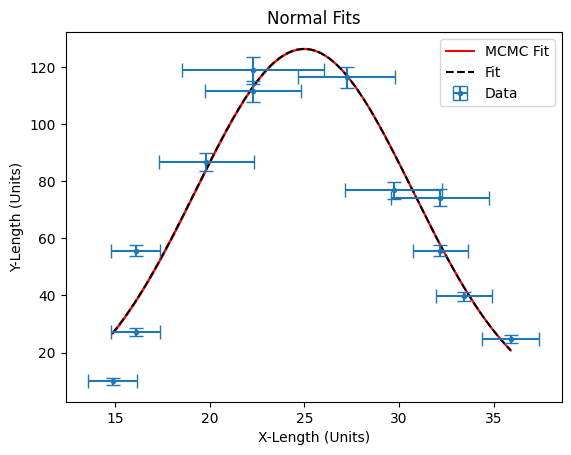

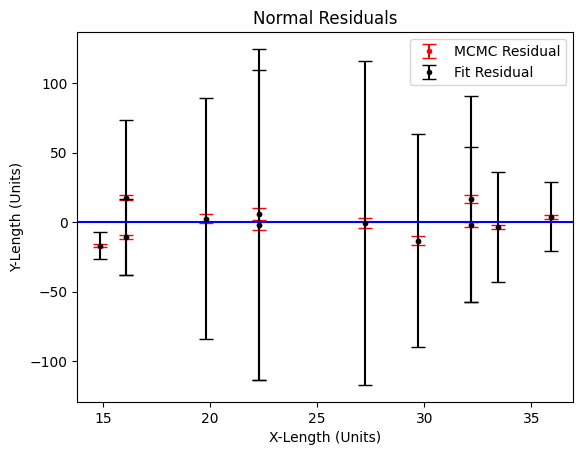

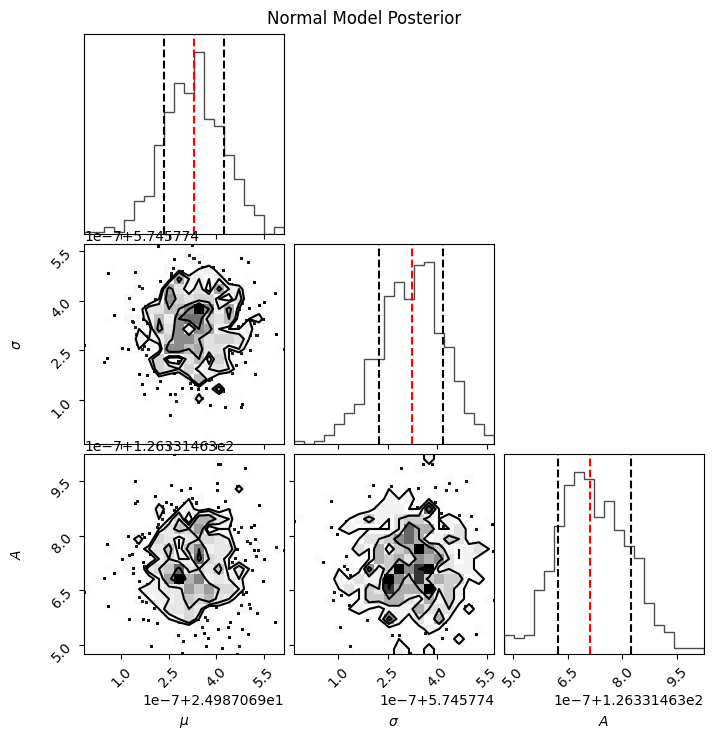

mu = 24.987 ± 0.000
sigma = 5.746 ± 0.000
A = 126.331 ± 0.000
[0.32332505 0.3628508  7.77526182]
[ 24.98706933   5.74577432 126.33146371]
Running burn-in...


/tmp/ipykernel_12909/1290853016.py:100: RuntimeWarning: invalid value encountered in sqrt
  print(np.diag(np.sqrt(pcov)))


Running production...
32.01109121217084
4.2465867140609734e-57


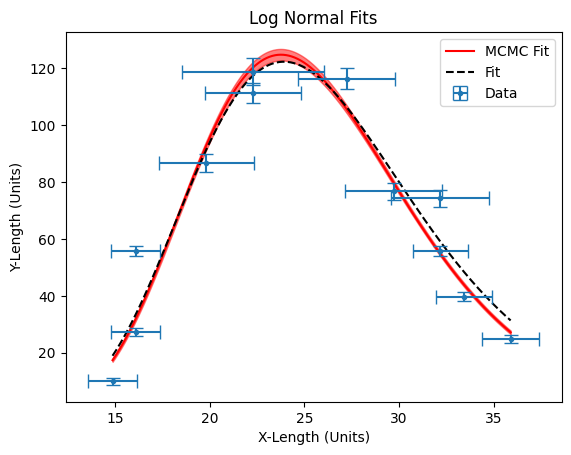

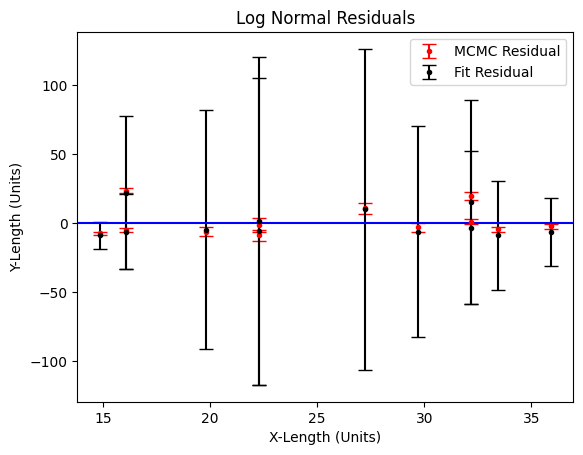

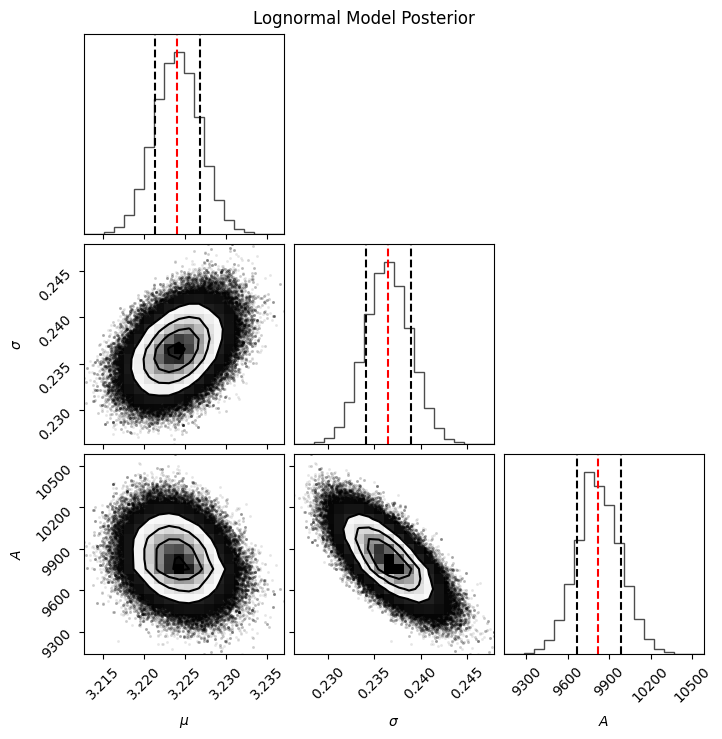

mu = 3.224 ± 0.003
sigma = 0.236 ± 0.002
A = 9824.533 ± 160.720
[3.23501113e+00 2.46254878e-01 9.75735959e+03]
[1.47973085e-02 1.55900016e-02 5.61399206e+02]
Running burn-in...


/tmp/ipykernel_12909/1290853016.py:188: RuntimeWarning: invalid value encountered in sqrt
  print(np.diag(np.sqrt(pcov)))
/arc/home/akhadir/.local/lib/python3.12/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


Running production...
65.00340672247883
0.0


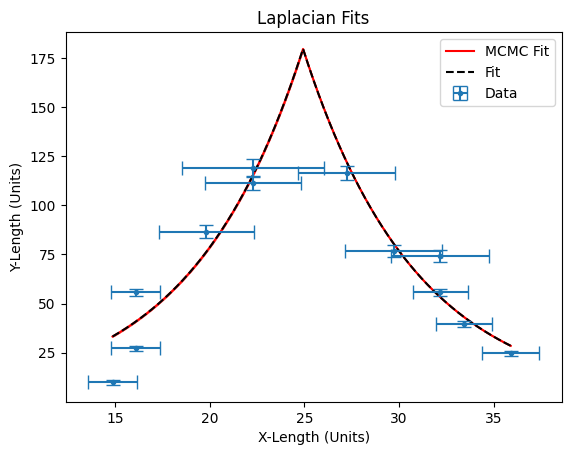

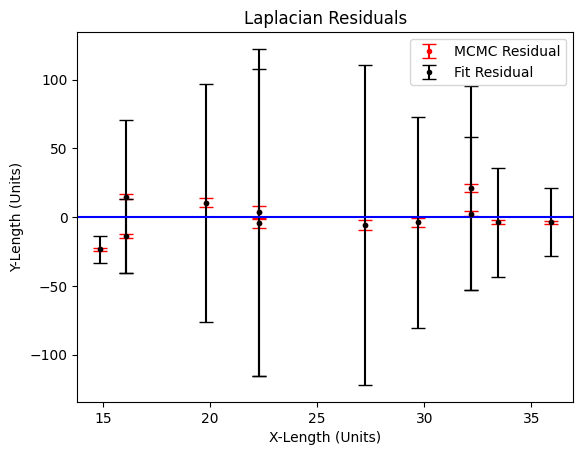

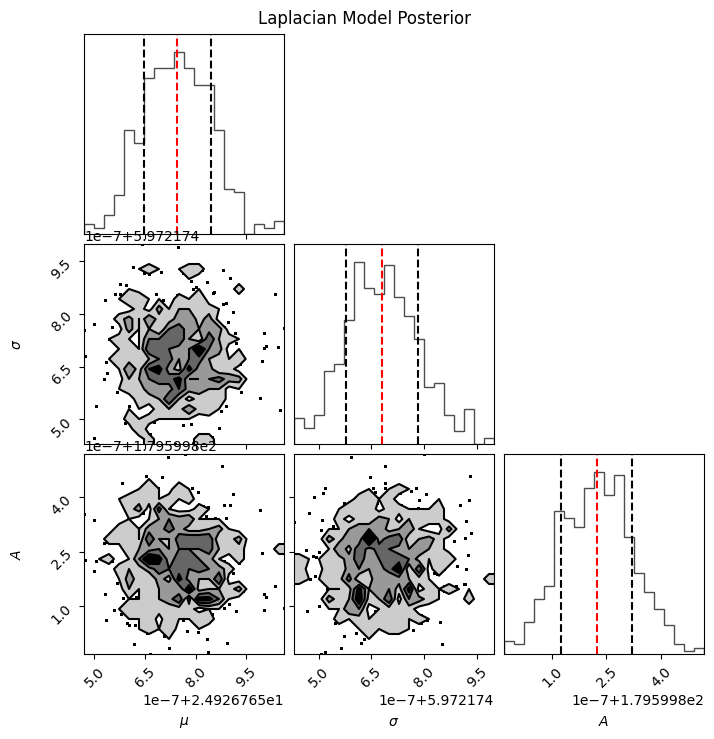

mu = 24.927 ± 0.000
sigma = 5.972 ± 0.000
A = 179.600 ± 0.000
[ 24.92676575   5.97217468 179.59980023]
[ 0.31410346  0.80295198 19.11081672]


/tmp/ipykernel_12909/1290853016.py:274: RuntimeWarning: invalid value encountered in sqrt
  print(np.diag(np.sqrt(pcov)))


In [64]:


import corner 
nwalkers = 500
niter = 1000




x_res_array, y_res_array = rescale(x_array, y_array, s_array)
x_res_err = uncertainty_prop(x_array, x_err_array, x_res_array)
y_res_err = uncertainty_prop(y_array, y_err_array, y_res_array)

x_line = np.linspace(min(x_res_array), max(x_res_array), 1000)


real_data = scipy.odr.RealData(x_res_array, y_res_array, sx = x_res_err, sy = y_res_err)

normal_model = scipy.odr.Model(mc_normal_model)
popt, pcov = scipy.optimize.curve_fit(normal, x_res_array, y_res_array, p0 = [np.mean(x_res_array), np.std(x_res_array), max(y_res_array)])

odr = scipy.odr.ODR(real_data, normal_model, beta0=popt)
out = odr.run()


data = (x_res_array, y_res_array, y_res_err)
initial = popt
ndim = len(initial)
model_name = 'normal'
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

sampler, pos, prob, state = main(p0,nwalkers,niter,ndim, lnprob, data, model_name)

samples = sampler.flatchain


new_theta_max  = samples[np.argmax(sampler.flatlnprobability)]


new_best_fit_model = mc_normal_model(new_theta_max, x_line)

med_model, spread = sample_walkers(10, samples,x_line, 'normal')

print(redchi2(y_res_array, mc_normal_model(new_theta_max, x_res_array), y_res_err))
chi2prob = scipy.stats.chi2.pdf(redchi2(y_res_array, mc_normal_model(new_theta_max, x_res_array)*9, y_res_err), 9)
print(chi2prob)
plt.title('Normal Fits')
plt.plot(x_line, new_best_fit_model, color = 'red', label = 'MCMC Fit')
plt.fill_between(x_line, new_best_fit_model + spread, new_best_fit_model - spread, color = 'red', alpha = 0.5)
plt.plot(x_line, normal(x_line, *popt), label = 'Fit', ls = '--', c = 'black')
plt.errorbar(x_res_array, y_res_array, xerr = x_res_err, yerr = y_res_err,  fmt ='.', capsize = 5, label = 'Data')
plt.xlabel('X-Length (Units)')
plt.ylabel('Y-Length (Units)')
plt.legend()
plt.show()
plt.close()

med_model, spread = sample_walkers(10, samples,x_res_array, 'lognormal')
plt.title('Normal Residuals')
plt.errorbar(x_res_array, y_res_array - mc_normal_model(new_theta_max, x_res_array), yerr = np.sqrt(y_res_err**2 + spread**2), fmt = '.', capsize = 5, label = 'MCMC Residual', color = 'red')
plt.errorbar(x_res_array, y_res_array - normal(x_res_array, *popt), yerr = y_res_array,  label = 'Fit Residual', color = 'black', fmt = '.', capsize = 5)
plt.axhline(0, color = 'blue')
plt.xlabel('X-Length (Units)')
plt.ylabel('Y-Length (Units)')
plt.legend()
plt.show()
plt.close()

labels = ['$\mu$', '$\sigma$', '$A$']
fig = corner.corner(samples,
                     labels=labels,
                     colors='color',
                     hist_kwargs={'color': 'black', 'alpha': 0.7},  
                     scatter_kwargs={'color': 'green', 'alpha': 0.5})
for i in range(samples.shape[1]):
    median = np.median(samples[:, i])
    percentiles = np.percentile(samples[:, i], [16, 84])


    ax = fig.axes[i*(samples.shape[1] + 1)]
    ax.axvline(median, color='red', linestyle='--')
    ax.axvline(percentiles[0], color='black', linestyle='--')
    ax.axvline(percentiles[1], color='black', linestyle='--')
fig.suptitle('Normal Model Posterior')
plt.show()
plt.close()

param_names = [ 'mu', 'sigma', 'A']  
results = {}

for i, param in enumerate(param_names):
    mean = np.mean(samples[:, i])
    std_dev = np.std(samples[:, i])
    results[param] = (mean, std_dev)

# Print results
for param, (mean, std_dev) in results.items():
    print(f"{param} = {mean:.3f} ± {std_dev:.3f}")
print(np.diag(np.sqrt(pcov)))
print(popt)


real_data = scipy.odr.RealData(x_res_array, y_res_array, sx = x_res_err, sy = y_res_err)

lognormal_model = scipy.odr.Model(mc_lognormal_model)
popt, pcov = scipy.optimize.curve_fit(lognormal, x_res_array, y_res_array, p0 = [np.mean(x_res_array), np.std(x_res_array), max(y_res_array)])

odr = scipy.odr.ODR(real_data, lognormal_model, beta0=popt)
out = odr.run()
data = (x_res_array, y_res_array, y_res_err)
initial = popt
ndim = len(initial)
model_name = 'lognormal'
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

sampler, pos, prob, state = main(p0,nwalkers,niter,ndim, lnprob, data, 'lognormal')

samples = sampler.flatchain


new_theta_max  = samples[np.argmax(sampler.flatlnprobability)]


new_best_fit_model = mc_lognormal_model(new_theta_max, x_line)

med_model, spread = sample_walkers(10, samples,x_line, 'lognormal')

print(redchi2(y_res_array, mc_lognormal_model(new_theta_max, x_res_array), y_res_err))
chi2prob = scipy.stats.chi2.pdf(redchi2(y_res_array, mc_lognormal_model(new_theta_max, x_res_array), y_res_err)*9, 9)
print(chi2prob)

plt.title('Log Normal Fits')
plt.plot(x_line, new_best_fit_model, color = 'red', label = 'MCMC Fit')

plt.fill_between(x_line, new_best_fit_model + spread, new_best_fit_model - spread, color = 'red', alpha = 0.5)
plt.plot(x_line, lognormal(x_line, *popt), label = 'Fit', ls = '--', c = 'black')
plt.errorbar(x_res_array, y_res_array, xerr = x_res_err, yerr = y_res_err,  fmt ='.', capsize = 5, label = 'Data')
plt.xlabel('X-Length (Units)')
plt.ylabel('Y-Length (Units)')
plt.legend()
plt.show()
plt.close()

med_model, spread = sample_walkers(10, samples,x_res_array, 'lognormal')
plt.title('Log Normal Residuals')
plt.errorbar(x_res_array, y_res_array - mc_lognormal_model(new_theta_max, x_res_array), yerr = np.sqrt(y_res_err**2 + spread**2), fmt = '.', capsize = 5, label = 'MCMC Residual', color = 'red')
plt.errorbar(x_res_array, y_res_array - lognormal(x_res_array, *popt), yerr = y_res_array,  label = 'Fit Residual', color = 'black', fmt = '.', capsize = 5)
plt.axhline(0, color = 'blue')
plt.xlabel('X-Length (Units)')
plt.ylabel('Y-Length (Units)')
plt.legend()
plt.show()
plt.close()

labels = ['$\mu$', '$\sigma$', '$A$']
fig = corner.corner(samples,
                     labels=labels,
                     colors='color',
                     hist_kwargs={'color': 'black', 'alpha': 0.7},  
                     scatter_kwargs={'color': 'green', 'alpha': 0.5})
for i in range(samples.shape[1]):
    median = np.median(samples[:, i])
    percentiles = np.percentile(samples[:, i], [16, 84])

    ax = fig.axes[i*(samples.shape[1] + 1)]
    ax.axvline(median, color='red', linestyle='--')
    ax.axvline(percentiles[0], color='black', linestyle='--')
    ax.axvline(percentiles[1], color='black', linestyle='--')
fig.suptitle('Lognormal Model Posterior')
plt.show()
plt.close()

param_names = [ 'mu', 'sigma', 'A'] 
results = {}

for i, param in enumerate(param_names):
    mean = np.mean(samples[:, i])
    std_dev = np.std(samples[:, i])
    results[param] = (mean, std_dev)

# Print results
for param, (mean, std_dev) in results.items():
    print(f"{param} = {mean:.3f} ± {std_dev:.3f}")
print(popt)
print(np.diag(np.sqrt(pcov)))


real_data = scipy.odr.RealData(x_res_array, y_res_array, sx = x_res_err, sy = y_res_err)

laplacian_model = scipy.odr.Model(mc_laplacian_model)
popt, pcov = scipy.optimize.curve_fit(laplacian, x_res_array, y_res_array, p0 = [np.mean(x_res_array), np.std(x_res_array), max(y_res_array)])

odr = scipy.odr.ODR(real_data, laplacian_model, beta0=popt)
out = odr.run()
data = (x_res_array, y_res_array, y_res_err)
initial = popt
ndim = len(initial)
model_name = 'laplacian'

p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

sampler, pos, prob, state = main(p0,nwalkers,niter,ndim, lnprob, data, 'laplacian')

samples = sampler.flatchain


new_theta_max  = samples[np.argmax(sampler.flatlnprobability)]


new_best_fit_model = mc_laplacian_model(new_theta_max, x_line)

med_model, spread = sample_walkers(10, samples,x_line, 'laplacian')
print(redchi2(y_res_array, mc_laplacian_model(new_theta_max, x_res_array), y_res_err))
chi2prob = scipy.stats.chi2.pdf(redchi2(y_res_array,mc_laplacian_model(new_theta_max, x_res_array)*9, y_res_err), 9)
print(chi2prob)
plt.title('Laplacian Fits')
plt.plot(x_line, new_best_fit_model, color = 'red', label = 'MCMC Fit')
plt.fill_between(x_line, new_best_fit_model + spread, new_best_fit_model - spread, color = 'red', alpha = 0.5)
plt.plot(x_line, laplacian(x_line, *popt), label = 'Fit', ls = '--', c = 'black')
plt.errorbar(x_res_array, y_res_array, xerr = x_res_err, yerr = y_res_err,  fmt ='.', capsize = 5, label = 'Data')
plt.xlabel('X-Length (Units)')
plt.ylabel('Y-Length (Units)')
plt.legend()
plt.show()
plt.close()

med_model, spread = sample_walkers(10, samples,x_res_array, 'lognormal')
plt.title('Laplacian Residuals')
plt.errorbar(x_res_array, y_res_array - mc_laplacian_model(new_theta_max, x_res_array), yerr = np.sqrt(y_res_err**2 + spread**2), fmt = '.', capsize = 5, label = 'MCMC Residual', color = 'red')
plt.errorbar(x_res_array, y_res_array - laplacian(x_res_array, *popt), yerr = y_res_array,  label = 'Fit Residual', color = 'black', fmt = '.', capsize = 5)
plt.axhline(0, color = 'blue')
plt.xlabel('X-Length (Units)')
plt.ylabel('Y-Length (Units)')
plt.legend()
plt.show()
plt.close()

labels = ['$\mu$', '$\sigma$', '$A$']
fig = corner.corner(samples,
                     labels=labels,
                     colors='color',
                     hist_kwargs={'color': 'black', 'alpha': 0.7},  
                     scatter_kwargs={'color': 'green', 'alpha': 0.5},
                    fill_contours = True)
for i in range(samples.shape[1]):
    median = np.median(samples[:, i])
    percentiles = np.percentile(samples[:, i], [16, 84])

    ax = fig.axes[i*(samples.shape[1] + 1)]
    ax.axvline(median, color='red', linestyle='--')
    ax.axvline(percentiles[0], color='black', linestyle='--')
    ax.axvline(percentiles[1], color='black', linestyle='--')
fig.suptitle('Laplacian Model Posterior')
plt.show()
plt.close()

param_names = [ 'mu', 'sigma', 'A'] 
results = {}

for i, param in enumerate(param_names):
    mean = np.mean(samples[:, i])
    std_dev = np.std(samples[:, i])
    results[param] = (mean, std_dev)

# Print results
for param, (mean, std_dev) in results.items():
    print(f"{param} = {mean:.3f} ± {std_dev:.3f}")
print(popt)
print(np.diag(np.sqrt(pcov)))